# Fitting max-stable PCA to max-linear models

In [1]:
library(evd)
library(maxstablePCA)
library(dplyr)
library(GGally)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
set.seed(1357)
s <- 200

In [3]:
library(foreach)
library(doParallel)

#setup parallel backend to use many processors
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

emp_errors_highdep <- foreach(i=1:100, .combine=c) %dopar% {
    
    library(evd)
    library(maxstablePCA)
    
    X <- rmvevd(10000, dep = .2, model = "log", d = 5)
    Xtrafo <- transform_unitpareto(X)
    
    maxPCA_curr <- max_stable_prcomp(Xtrafo, p = 2, s = s)
    
   emp_error_curr = maxPCA_curr$loss_fctn_value
   emp_error_curr 
}

#stop cluster
stopCluster(cl)

Loading required package: iterators

Loading required package: parallel



In [4]:
library(foreach)
library(doParallel)

#setup parallel backend to use many processors
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

emp_errors_meddep <- foreach(i=1:100, .combine=c) %dopar% {
    
    library(evd)
    library(maxstablePCA)
    
    X <- rmvevd(10000, dep = .5, model = "log", d = 5)
    Xtrafo <- transform_unitpareto(X)
    
    maxPCA_curr <- max_stable_prcomp(Xtrafo, p = 3, s = s)
    
   emp_error_curr = maxPCA_curr$loss_fctn_value
   emp_error_curr 
}

#stop cluster
stopCluster(cl)

In [5]:
library(foreach)
library(doParallel)

#setup parallel backend to use many processors
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

emp_errors_lowdep <- foreach(i=1:100, .combine=c) %dopar% {
    
    library(evd)
    library(maxstablePCA)
    
    X <- rmvevd(10000, dep = .8, model = "log", d = 5)
    Xtrafo <- transform_unitpareto(X)
    
    maxPCA_curr <- max_stable_prcomp(Xtrafo, p = 4, s = s)
    
   emp_error_curr = maxPCA_curr$loss_fctn_value
   emp_error_curr 
}

#stop cluster
stopCluster(cl)

In [6]:
plot_dat <- data.frame(
    emp_errors = c(emp_errors_highdep, emp_errors_meddep, emp_errors_lowdep), 
    beta = c(rep("0.2", 100), rep("0.5", 100), rep("0.8", 100))
)

In [10]:
emp_errors_highdep

[1] 0.8941994 0.7598141 0.8572960 0.8060022 0.9004179 0.7568072 0.9222326
  [8] 0.8461585 0.8061052 0.7198912 0.8680217 0.8816544 0.7963886 0.7782442
 [15] 0.9369639 0.8521318 0.8022484 0.8938770 0.8957839 0.8498220 0.8896942
 [22] 0.8239544 0.8724715 0.8664777 0.7890472 0.8719604 0.7321974 0.8569519
 [29] 0.8440171 0.9352776 0.8555624 0.8270251 0.8831913 0.8824842 0.8334089
 [36] 0.8908437 0.8325111 0.8551697 0.9104889 0.8191941 0.8372219 0.9130115
 [43] 0.8872637 0.8147055 0.8140276 0.8292877 0.8287532 0.8304458 0.8586509
 [50] 0.8463353 0.8869615 0.9235138 0.8731466 0.8043669 0.9140582 0.8643526
 [57] 0.7971453 0.9258759 1.2067530 0.8010608 0.8500092 0.7505061 0.9464774
 [64] 0.6991109 0.8553592 0.8654041 0.8183880 0.7914437 0.8077561 0.9048694
 [71] 0.8793646 0.8369437 0.8590846 0.8142265 0.8006560 0.8429107 0.8676434
 [78] 0.7688453 0.7530958 0.7754132 0.9251775 0.8628922 0.7927633 0.8287124
 [85] 0.7883570 0.8544651 0.8278629 0.8924418 0.8072445 0.8635713 0.7745711
 [92] 0.8258175 0.9205240 0.7681408 0.9785771 0.8310532 0.8698893 0.8907227
 [99] 0.9528697 0.8152007

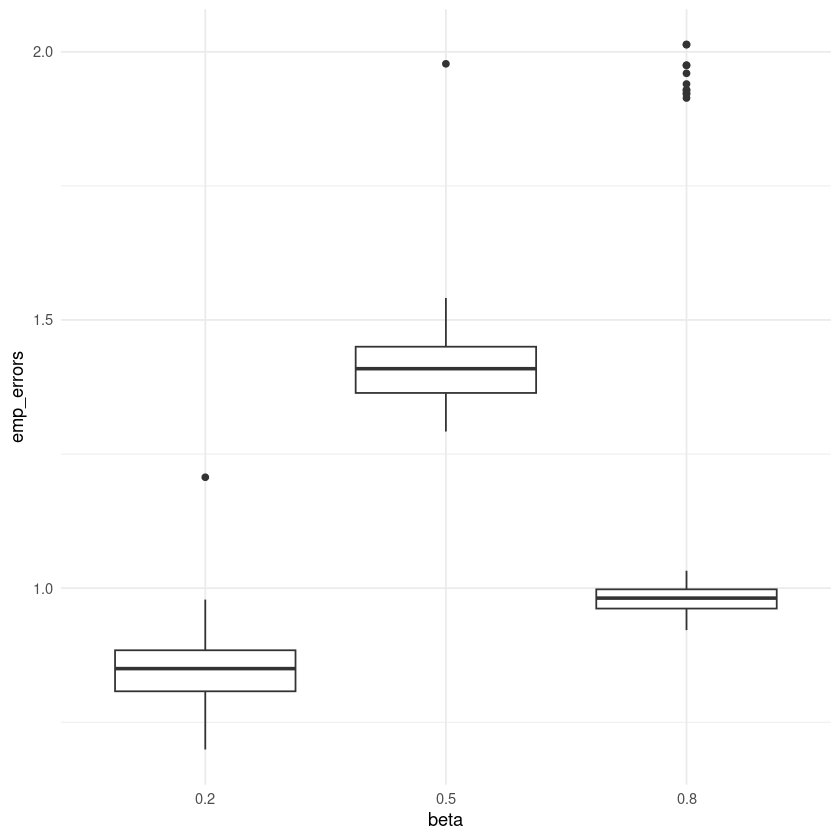

In [7]:
p1 <- ggplot(aes(x = beta, y = emp_errors), data = plot_dat) + 
geom_boxplot() + 
theme_minimal()

p1

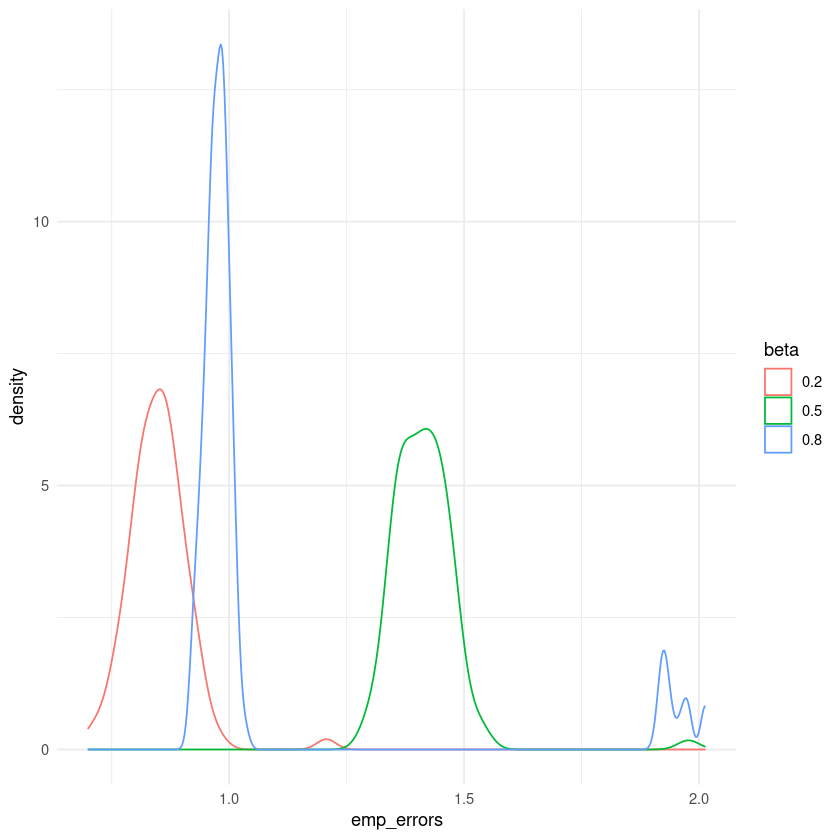

In [8]:
p2 <- ggplot(aes(x = emp_errors, color = beta), data = plot_dat) + 
geom_density() + 
theme_minimal()

p2

In [9]:
ggsave("boxplots_logsim.png", p1)
ggsave("densplots_logsim.png", p2)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
